# Support vector classifier 

In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [254]:
## createa a synthetic data points
from sklearn.datasets import make_classification


In [255]:
x,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [256]:
x

array([[ 1.51511917, -1.1035987 ],
       [ 1.24619064, -0.25263676],
       [-0.91341787, -1.9155969 ],
       ...,
       [ 0.01163668,  3.73353348],
       [-1.77523748, -0.2520168 ],
       [ 0.79986198,  1.96867295]])

In [257]:
y

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [258]:
x_df = pd.DataFrame(x)

##ensure x adn y are in 1d 
x_vals = x_df.iloc[:,0].values.ravel() #convert first column to 1D
y_vals = x_df.iloc[:,1].values.ravel() #convert second col to 1d
hue_vals = pd.Series(y).values.ravel() #conert y to 1d if needed

<Axes: >

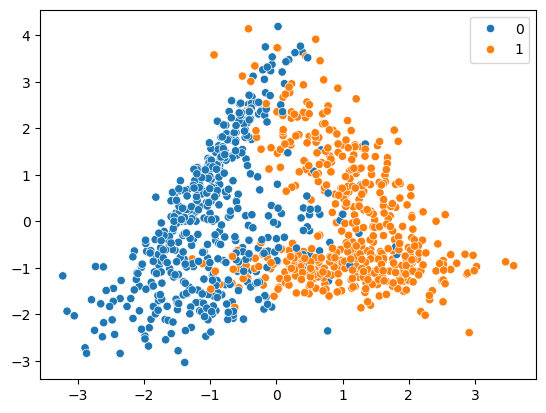

In [259]:
sns.scatterplot(x = x_vals,y = y_vals,hue=hue_vals)

In [260]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)


In [261]:
from sklearn.svm import SVC
svc= SVC(kernel='linear')

In [262]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [263]:
## prediciton
y_pred = svc.predict(x_test)

In [264]:
from sklearn.metrics import classification_report,confusion_matrix


In [265]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       123
           1       0.94      0.93      0.93       127

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[115   8]
 [  9 118]]


In [266]:
rbf = SVC(kernel='rbf')
rbf.fit(x_train,y_train)

SVC()

In [267]:
y_pred_rbf = rbf.predict(x_test)

In [268]:
print(classification_report(y_test,y_pred_rbf))
print(confusion_matrix(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       123
           1       0.93      0.92      0.92       127

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[114   9]
 [ 10 117]]


In [269]:

poly=SVC(kernel='poly')
poly.fit(x_train,y_train)
y_pred2=poly.predict(x_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       123
           1       0.88      0.95      0.92       127

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[107  16]
 [  6 121]]


# Hyper Parameter Tuning wiht SVC

In [270]:

from sklearn.model_selection import GridSearchCV
## Defining parameter range
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}

In [271]:
grid = GridSearchCV(SVC(),param_grid=param_grid,cv=5,verbose=3,refit=True)

In [272]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [273]:
y_pred3 = grid.predict(x_test)

In [274]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [275]:
grid.best_score_

0.9120000000000001

In [276]:
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       123
           1       0.98      0.94      0.96       127

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[120   3]
 [  8 119]]
